# Dirty-MNIST

## Baseline: Evaluate entropy, margin sampling, and BALD acquisition using DirtyMNIST’s training set as pool set and evaluate on Dirty-MNIST’s test set. Compare their performance over 10 trials, plotting learning curves with confidence intervals.

In [ ]:
_,train_loader_dirty_mnist, _, test_loader_dirty_mnist, _ =  get_data_loaders(batch_size=64, eval_batch_size=1024, device=device)
# Assuming train_loader_dirty_mnist is already defined and contains the dataset
full_train_dataset = train_loader_dirty_mnist.dataset

# Extract the data and labels
data = []
labels = []
for sample, label in full_train_dataset:
    data.append(sample)
    labels.append(label)
data = torch.stack(data)  # Combine all tensors into a single tensor
labels = torch.tensor(labels)  # Convert list of labels to a tensor

# random acquisition
labels = labels.numpy()  # Convert labels to a numpy array
train_idx = np.arange(len(full_train_dataset))  # Create Training Examples indices

# Create a pool of all labeled examples by their indices
unlabeled_pool = [train_idx[labels == c] for c in range(10)]  # Group indices by class

In [ ]:
# unlabeled_pool[0].shape

#### Evaluate entropy

In [ ]:
def entropy_sampling(model , labeled_indices, unlabeled_pool, full_train_dataset , k):
  sampled_indices = labeled_indices

  for cls,mini_pool in enumerate(unlabeled_pool):
    subset = Subset(full_train_dataset, indices=mini_pool)
    subset_loader = DataLoader(subset,batch_size=1024 ,shuffle=False)

    log_probs = mc_dropout(model, subset_loader, n =32)
    uncertainties = compute_uncertainties(log_probs)

    predictive_uncertainty = uncertainties[1]

    top_k_min_indices = np.argsort(np.array(predictive_uncertainty.cpu()))[:k]
    indices_to_remove = np.array(mini_pool)[top_k_min_indices]
    sampled_indices = np.concatenate((sampled_indices, indices_to_remove))
    unlabeled_pool[cls] = np.setdiff1d(mini_pool, indices_to_remove)

  return sampled_indices , unlabeled_pool

In [ ]:
unlabeled_pool = [train_idx[labels == c] for c in range(10)]

#  Trianning by increasing data points
labeled_per_class = [1,2, 4, 8, 16, 32 , 64 , 128]

# get the 20 data points
initial_subset = select_k(1)
# initialized labeled data
labeled_pool =  initial_subset
entropy_TRAIN_ACCURACIES = []
entropy_TEST_ACCURACIES = []

for samples in labeled_per_class :
  seed = 42 + len(labeled_pool)

  train_trial_result = [];  test_trial_result = []
  epochs = get_epoch(labeled_pool)

  for trial in range(10):
    np.random.seed(seed) ;  torch.manual_seed(seed)

    model, optimizer = create_model_optimizer(seed+trial)
    #  get accuracies
    model, train_acc = train_labeled(model,optimizer, labeled_pool , full_train_dataset, epochs, trial)
    test_accuracy = eval_model(model , test_loader_dirty_mnist)
    # track metrics
    train_trial_result.append(train_acc)
    test_trial_result.append(test_accuracy)
  entropy_TRAIN_ACCURACIES.append((len(labeled_pool) ,train_trial_result ))
  entropy_TEST_ACCURACIES.append((len(labeled_pool),test_trial_result))

# select one sampel for each class, total k = 10


  # update the labeled indices
  labeled_pool,unlabeled_pool=  entropy_sampling(model,labeled_pool, unlabeled_pool, full_train_dataset , samples)



  print(f" Training acc : {train_acc:.1f} % | Test acc : {test_accuracy:.1f} %" )

training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.45it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.43it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.46it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.84it/s]


 Training acc : 100.0 % | Test acc : 30.9 %
training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.83it/s]


 Training acc : 95.0 % | Test acc : 38.2 %
training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 100.0 % | Test acc : 37.5 %
training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 98.8 % | Test acc : 36.0 %
training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 99.4 % | Test acc : 40.1 %
training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.83it/s]


 Training acc : 99.4 % | Test acc : 42.3 %
training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.83it/s]


 Training acc : 99.2 % | Test acc : 45.3 %
training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.83it/s]


 Training acc : 97.3 % | Test acc : 51.1 %


In [ ]:
import pickle
# Data to save
data_to_save = {
    "entropy_TRAIN_ACCURACIES": entropy_TRAIN_ACCURACIES,
    "entropy_TEST_ACCURACIES": entropy_TEST_ACCURACIES,

}

# Save to pickle file
with open("entropy_accuracies.pkl", "wb") as file:
    pickle.dump(data_to_save, file)

print("Data saved to entropy_accuracies.pkl")


Data saved to entropy_accuracies.pkl


#### Margin Sampling

In [ ]:
unlabeled_pool = [train_idx[labels == c] for c in range(10)]

#  Trianning by increasing data points
labeled_per_class = [1,2, 4, 8, 16, 32 , 64 ,128]
# Define geometric progression for epochs
epochs_list = np.geomspace(start=1, stop=2048, num=12, dtype=int)

# get the 20 data points
initial_subset = select_k(1)
# initialized labeled data
labeled_pool =  initial_subset
margin_TRAIN_ACCURACIES = []
margin_TEST_ACCURACIES = []

for samples in labeled_per_class :
  seed = 42 + len(labeled_pool)

  train_trial_result = [];  test_trial_result = []
  epochs = get_epoch(labeled_pool)

  for trial in range(10):
    np.random.seed(seed) ;  torch.manual_seed(seed)

    model, optimizer = create_model_optimizer(seed+trial)
    #  get accuracies
    model, train_acc = train_labeled(model,optimizer, labeled_pool , full_train_dataset, epochs, trial)
    test_accuracy = eval_model(model , test_loader_dirty_mnist)
    # track metrics
    train_trial_result.append(train_acc)
    test_trial_result.append(test_accuracy)
  margin_TRAIN_ACCURACIES.append((len(labeled_pool) ,train_trial_result ))
  margin_TEST_ACCURACIES.append((len(labeled_pool),test_trial_result))

# select one sampel for each class, total k = 10


  # update the labeled indices
  labeled_pool,unlabeled_pool=  margin_sampling(labeled_pool, unlabeled_pool, full_train_dataset , samples)


  print(f" Training acc : {train_acc:.1f} % | Test acc : {test_accuracy:.1f} %" )

training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.47it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.43it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.44it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.47it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.45it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.42it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.46it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


 Training acc : 100.0 % | Test acc : 34.6 %
training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.55it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.44it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.46it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


 Training acc : 100.0 % | Test acc : 42.0 %
training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.42it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.46it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.54it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


 Training acc : 97.5 % | Test acc : 47.7 %
training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.54it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.47it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.43it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


 Training acc : 96.2 % | Test acc : 56.6 %
training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.46it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.43it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.47it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


 Training acc : 93.1 % | Test acc : 60.9 %
training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.46it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.43it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


 Training acc : 90.3 % | Test acc : 65.7 %
training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.45it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.43it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


 Training acc : 76.6 % | Test acc : 70.2 %
training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.45it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.41it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.54it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


 Training acc : 55.3 % | Test acc : 69.8 %


In [ ]:

import pickle

# Data to save
data_to_save = {

    "margin_TRAIN_ACCURACIES": margin_TRAIN_ACCURACIES,
    "margin_TEST_ACCURACIES": margin_TEST_ACCURACIES
}

# Save to pickle file
with open("margin_accuracies.pkl", "wb") as file:
    pickle.dump(data_to_save, file)

print("Data saved to margin_accuracies.pkl")


Data saved to margin_accuracies.pkl


### Bald Sampling


In [ ]:
unlabeled_pool = [train_idx[labels == c] for c in range(10)]

#  Trianning by increasing data points
labeled_per_class = [1,2, 4, 8, 16, 32 , 64 , 128]

# get the 20 data points
initial_subset = select_k(1)
# initialized labeled data
labeled_pool =  initial_subset
Bald_TRAIN_ACCURACIES = []
Bald_TEST_ACCURACIES = []

for samples in labeled_per_class :
  seed = 42 + len(labeled_pool)

  train_trial_result = [];  test_trial_result = []
  epochs = get_epoch(labeled_pool)

  for trial in range(10):
    np.random.seed(seed) ;  torch.manual_seed(seed)

    model, optimizer = create_model_optimizer(seed+trial)
    #  get accuracies
    model, train_acc = train_labeled(model,optimizer, labeled_pool , full_train_dataset, epochs, trial)
    test_accuracy     =  eval_model(model , test_loader_dirty_mnist)
    # track metrics
    train_trial_result.append(train_acc)
    test_trial_result.append(test_accuracy)
  Bald_TRAIN_ACCURACIES.append((len(labeled_pool) ,train_trial_result ))
  Bald_TEST_ACCURACIES.append((len(labeled_pool),test_trial_result))

# select one sampel for each class, total k = 10


  # update the labeled indices
  labeled_pool,unlabeled_pool=  Bald_sampling(model,labeled_pool, unlabeled_pool, full_train_dataset, samples )


  print(f" Training acc : {train_acc:.1f} % | Test acc : {test_accuracy:.1f} %" )

training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.43it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.39it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.47it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.53it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.52it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.47it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 200 Epochs, with 10 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.84it/s]


 Training acc : 100.0 % | Test acc : 34.7 %
training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 20 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 100.0 % | Test acc : 39.2 %
training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 40 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 95.0 % | Test acc : 42.3 %
training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 200 Epochs, with 80 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 100.0 % | Test acc : 42.5 %
training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 160 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 98.8 % | Test acc : 43.5 %
training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 100 Epochs, with 320 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.80it/s]


 Training acc : 99.7 % | Test acc : 44.0 %
training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.47it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.48it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 50 Epochs, with 640 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.83it/s]


 Training acc : 99.2 % | Test acc : 48.1 %
training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 0


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 1


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 2


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 3


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 4


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.49it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 5


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 6


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 7


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 8


Predicting with MC Dropout Ensembles: 100%|██████████| 69/69 [00:12<00:00,  5.50it/s]


training Model for 10 Epochs, with 1280 Labeled Data , Trial NO. 9


Predicting with MC Dropout Ensembles: 100%|██████████| 17/17 [00:02<00:00,  5.82it/s]


 Training acc : 98.0 % | Test acc : 48.6 %


In [ ]:
# Data to save
data_to_save = {
    "bald_TRAIN_ACCURACIES": Bald_TRAIN_ACCURACIES,
    "bald_TEST_ACCURACIES": Bald_TEST_ACCURACIES
}

# Save to pickle file
with open("bald_accuracies.pkl", "wb") as file:
    pickle.dump(data_to_save, file)

print("Data saved to Bald_accuracies.pkl")


Data saved to Bald_accuracies.pkl


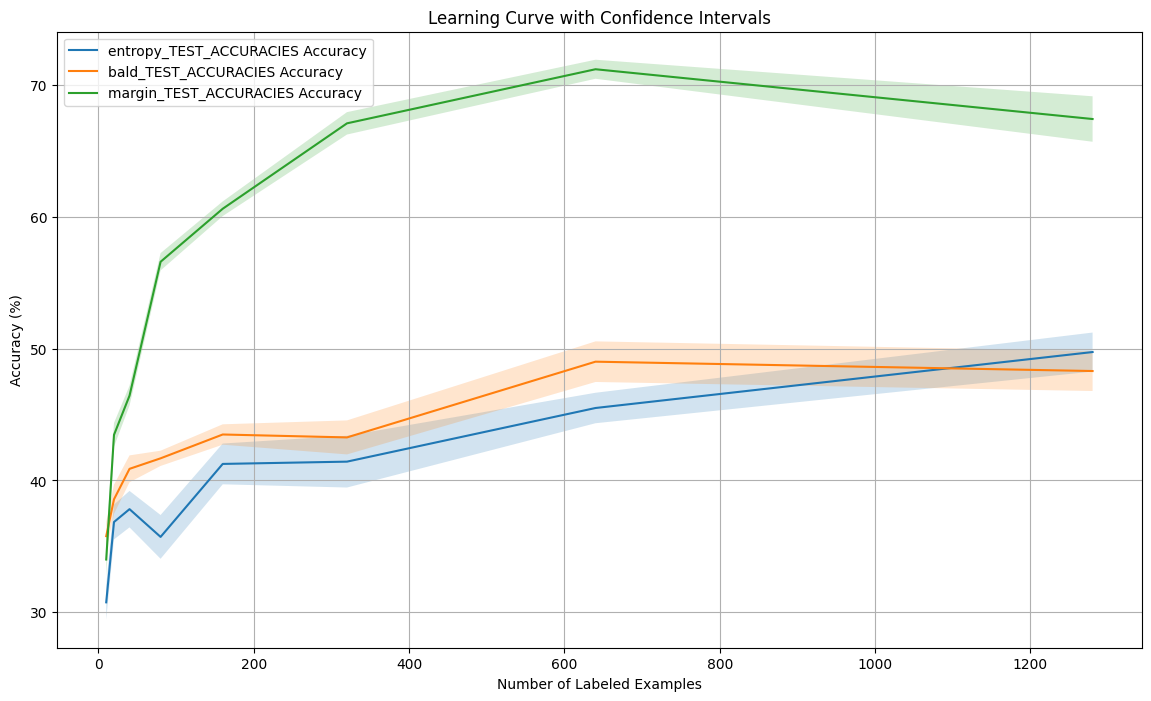

In [ ]:
test_accuracies_dict = {
    "entropy_TEST_ACCURACIES": entropy_TEST_ACCURACIES,
    "bald_TEST_ACCURACIES": Bald_TEST_ACCURACIES,
    "margin_TEST_ACCURACIES": margin_TEST_ACCURACIES

}

len_data = np.array([int(trial[0]) for trial in entropy_TEST_ACCURACIES])

plot_learning_curve_with_ci(test_accuracies_dict, len_data)

## Summary

The Margine Sampling outperforms both Bald and Entropy aquisition both in results and stability, with the increased no. of labeled examples, entropy slightly outperforms Bald Aquisition.